# Program synthesis results analysis

In [1]:
import os
import sys 
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:
sys.path.append("../")
sys.path.append("../../")

In [3]:
from src.utils.files import json2data

path = "/home/koutchc1/learnlab2023/outputs/gpt-3.5-turbo_v1_result_evaluation.json"
df = pd.DataFrame(json2data(path))
df = df.drop(columns=["Unnamed: 0"])
df

,problem_id,prompts,code,testcase,exec_result,score,text
0,a3_3_animals,"Bellow is a problem statement, write a program...",\nfor animal in list_of_animals:\n print(an...,"from cs110 import autograder\r\nimport random,...",completed,0.0,Unit Test Returned: 0.0\n
1,a3_1_cargo,"Bellow is a problem statement, write a program...","\nlist_of_cargo_planes = [""plane1"", ""plane2"", ...","from cs110 import autograder\nimport random, m...",completed,0.0,----------------------------------------------...
2,a3_3_games,"Bellow is a problem statement, write a program...",,"from cs110 import autograder\r\nimport random,...",completed,0.0,Unit Test Returned: 0.0\n
3,a3_4_heights,"Bellow is a problem statement, write a program...","\nlist_of_heights = [53, 60, 65]\n\nmax_height...","from cs110 import autograder\r\nimport random,...","failed: must be real number, not str",0.0,
4,lsn9_practice4,"Bellow is a problem statement, write a program...",,"from cs110 import autograder\r\nimport random,...",completed,0.0,--------------------------------------------\n...
...,...,...,...,...,...,...,...
141,a4_2_dog,"Bellow is a problem statement, write a program...","\ntemperature = float(input(""Outside Temperatu...","from cs110 import autograder\r\nimport random,...",completed,0.0,-------------------\nTest 1 of 4\n------------...
142,a4_1_lift,"Bellow is a problem statement, write a program...","\ndef calculate_lift(lift_coefficient, density...","from cs110 import autograder\r\nimport random,...",completed,100.0,Function Defined\nFunction Returned the Correc...
143,a4_1_buoyancy,"Bellow is a problem statement, write a program...","\ndef calculate_buoyancy(Vs, D, g):\n retur...","from cs110 import autograder\r\nimport random,...",completed,100.0,Function Defined\nFunction Returned the Correc...
144,a4_1_area,"Bellow is a problem statement, write a program...","\ndef calculate_area(Side_A, Side_B, Height):\...","from cs110 import autograder\r\nimport random,...",completed,100.0,Function Defined\nFunction Returned the Correc...


In [4]:
# TODO: load the results for both models at the same time, and then merge them together 

In [5]:
fails = df[df["exec_result"] != "completed"]
df = df[df["exec_result"] == "completed"]
df

,problem_id,prompts,code,testcase,exec_result,score,text
0,a3_3_animals,"Bellow is a problem statement, write a program...",\nfor animal in list_of_animals:\n print(an...,"from cs110 import autograder\r\nimport random,...",completed,0.0,Unit Test Returned: 0.0\n
1,a3_1_cargo,"Bellow is a problem statement, write a program...","\nlist_of_cargo_planes = [""plane1"", ""plane2"", ...","from cs110 import autograder\nimport random, m...",completed,0.0,----------------------------------------------...
2,a3_3_games,"Bellow is a problem statement, write a program...",,"from cs110 import autograder\r\nimport random,...",completed,0.0,Unit Test Returned: 0.0\n
4,lsn9_practice4,"Bellow is a problem statement, write a program...",,"from cs110 import autograder\r\nimport random,...",completed,0.0,--------------------------------------------\n...
5,lsn9_practice3,"Bellow is a problem statement, write a program...",,"from cs110 import autograder\r\nimport random,...",completed,0.0,Incorrect Pound Conversion. Expected 301.304\...
...,...,...,...,...,...,...,...
141,a4_2_dog,"Bellow is a problem statement, write a program...","\ntemperature = float(input(""Outside Temperatu...","from cs110 import autograder\r\nimport random,...",completed,0.0,-------------------\nTest 1 of 4\n------------...
142,a4_1_lift,"Bellow is a problem statement, write a program...","\ndef calculate_lift(lift_coefficient, density...","from cs110 import autograder\r\nimport random,...",completed,100.0,Function Defined\nFunction Returned the Correc...
143,a4_1_buoyancy,"Bellow is a problem statement, write a program...","\ndef calculate_buoyancy(Vs, D, g):\n retur...","from cs110 import autograder\r\nimport random,...",completed,100.0,Function Defined\nFunction Returned the Correc...
144,a4_1_area,"Bellow is a problem statement, write a program...","\ndef calculate_area(Side_A, Side_B, Height):\...","from cs110 import autograder\r\nimport random,...",completed,100.0,Function Defined\nFunction Returned the Correc...


In [6]:
df

,problem_id,prompts,code,testcase,exec_result,score,text
0,a3_3_animals,"Bellow is a problem statement, write a program...",\nfor animal in list_of_animals:\n print(an...,"from cs110 import autograder\r\nimport random,...",completed,0.0,Unit Test Returned: 0.0\n
1,a3_1_cargo,"Bellow is a problem statement, write a program...","\nlist_of_cargo_planes = [""plane1"", ""plane2"", ...","from cs110 import autograder\nimport random, m...",completed,0.0,----------------------------------------------...
2,a3_3_games,"Bellow is a problem statement, write a program...",,"from cs110 import autograder\r\nimport random,...",completed,0.0,Unit Test Returned: 0.0\n
4,lsn9_practice4,"Bellow is a problem statement, write a program...",,"from cs110 import autograder\r\nimport random,...",completed,0.0,--------------------------------------------\n...
5,lsn9_practice3,"Bellow is a problem statement, write a program...",,"from cs110 import autograder\r\nimport random,...",completed,0.0,Incorrect Pound Conversion. Expected 301.304\...
...,...,...,...,...,...,...,...
141,a4_2_dog,"Bellow is a problem statement, write a program...","\ntemperature = float(input(""Outside Temperatu...","from cs110 import autograder\r\nimport random,...",completed,0.0,-------------------\nTest 1 of 4\n------------...
142,a4_1_lift,"Bellow is a problem statement, write a program...","\ndef calculate_lift(lift_coefficient, density...","from cs110 import autograder\r\nimport random,...",completed,100.0,Function Defined\nFunction Returned the Correc...
143,a4_1_buoyancy,"Bellow is a problem statement, write a program...","\ndef calculate_buoyancy(Vs, D, g):\n retur...","from cs110 import autograder\r\nimport random,...",completed,100.0,Function Defined\nFunction Returned the Correc...
144,a4_1_area,"Bellow is a problem statement, write a program...","\ndef calculate_area(Side_A, Side_B, Height):\...","from cs110 import autograder\r\nimport random,...",completed,100.0,Function Defined\nFunction Returned the Correc...


In [7]:
df

,problem_id,prompts,code,testcase,exec_result,score,text
0,a3_3_animals,"Bellow is a problem statement, write a program...",\nfor animal in list_of_animals:\n print(an...,"from cs110 import autograder\r\nimport random,...",completed,0.0,Unit Test Returned: 0.0\n
1,a3_1_cargo,"Bellow is a problem statement, write a program...","\nlist_of_cargo_planes = [""plane1"", ""plane2"", ...","from cs110 import autograder\nimport random, m...",completed,0.0,----------------------------------------------...
2,a3_3_games,"Bellow is a problem statement, write a program...",,"from cs110 import autograder\r\nimport random,...",completed,0.0,Unit Test Returned: 0.0\n
4,lsn9_practice4,"Bellow is a problem statement, write a program...",,"from cs110 import autograder\r\nimport random,...",completed,0.0,--------------------------------------------\n...
5,lsn9_practice3,"Bellow is a problem statement, write a program...",,"from cs110 import autograder\r\nimport random,...",completed,0.0,Incorrect Pound Conversion. Expected 301.304\...
...,...,...,...,...,...,...,...
141,a4_2_dog,"Bellow is a problem statement, write a program...","\ntemperature = float(input(""Outside Temperatu...","from cs110 import autograder\r\nimport random,...",completed,0.0,-------------------\nTest 1 of 4\n------------...
142,a4_1_lift,"Bellow is a problem statement, write a program...","\ndef calculate_lift(lift_coefficient, density...","from cs110 import autograder\r\nimport random,...",completed,100.0,Function Defined\nFunction Returned the Correc...
143,a4_1_buoyancy,"Bellow is a problem statement, write a program...","\ndef calculate_buoyancy(Vs, D, g):\n retur...","from cs110 import autograder\r\nimport random,...",completed,100.0,Function Defined\nFunction Returned the Correc...
144,a4_1_area,"Bellow is a problem statement, write a program...","\ndef calculate_area(Side_A, Side_B, Height):\...","from cs110 import autograder\r\nimport random,...",completed,100.0,Function Defined\nFunction Returned the Correc...


In [8]:
fails

,problem_id,prompts,code,testcase,exec_result,score,text
3,a3_4_heights,"Bellow is a problem statement, write a program...","\nlist_of_heights = [53, 60, 65]\n\nmax_height...","from cs110 import autograder\r\nimport random,...","failed: must be real number, not str",0.0,
18,lsn7_largest,"Bellow is a problem statement, write a program...","\ndef find_largest(num1, num2, num3):\n if ...","from cs110 import autograder\r\nimport random,...","failed: must be real number, not str",0.0,
25,lsn6_math,"Bellow is a problem statement, write a program...",\nimport math\n\nx = float(input())\ny = float...,"from cs110 import autograder\r\nimport random,...","failed: must be real number, not str",0.0,
26,lsn6_calories,"Bellow is a problem statement, write a program...",\nage = int(input())\nweight = int(input())\nh...,from cs110 import autograder\r\nimport random\...,"failed: must be real number, not str",0.0,
27,lsn6_bits_to_kmg,"Bellow is a problem statement, write a program...","\nbits = int(input(""Enter the number of bits: ...",from cs110 import autograder\r\nimport random\...,"failed: must be real number, not str",0.0,
28,lsn6_bits_to_bytes,"Bellow is a problem statement, write a program...","\nbits = int(input(""Enter the number of bits: ...",from cs110 import autograder\r\nimport random\...,"failed: must be real number, not str",0.0,
32,lsn5_scoreaverage,"Bellow is a problem statement, write a program...","\nscore1 = float(input(""Enter score 1: ""))\nsc...",from cs110 import autograder\r\nimport random\...,"failed: must be real number, not str",0.0,
41,lsn33_practice7,"Bellow is a problem statement, write a program...","\ndef pig_latin(sentence):\n vowels = ['a',...","import webbrowser\r\n\r\nprint(""That's it, the...",failed: 'NoneType' object is not callable,0.0,
77,lsn19_skill2,"Bellow is a problem statement, write a program...",,"from cs110 import autograder\r\nimport random,...",failed: name 'squadron_table' is not defined,0.0,
78,lsn19_skill1,"Bellow is a problem statement, write a program...","\nstarship_table = [\n [""Starship"", ""Crew S...","from cs110 import autograder\r\nimport random,...","failed: invalid syntax (lsn19_skill1.py, line 15)",0.0,


In [10]:
for pid, fail_reason, code, testcase in zip(fails.problem_id, fails.exec_result, fails.code, fails.testcase):
    print(pid)
    print(fail_reason)
    print("Code", code)
    print(testcase)
    print("-----------")
    print()

a3_4_heights
failed: must be real number, not str
Code 
list_of_heights = [53, 60, 65]

max_height = max(list_of_heights)
min_height = min(list_of_heights)

range_of_heights = max_height - min_height

print(range_of_heights)

from cs110 import autograder
import random, math

STUDENT_FILE = "a3_4_heights.py"
ANSWER = 8942


# Runs the Python script and sees if it passes the test(s)
def test_passed():
    
    output, error = autograder.run_script(STUDENT_FILE, [])
    lines = output.strip().split('\n')
    score = 0
    
    if len(lines) >= 1:           
        if autograder.equals(lines[0], ANSWER):
            print("CORRECT: Range Looks Good!")
            score += 100
        else:
            print("Incorrect range.  Remember that the range is the difference between the max and the min")
            
    else:
        print("More lines expected in your answer.  Make sure you are printing out the range.")
    
    return score

# ---------------------------------------------------

In [11]:
for prompt, code, testcase, error in df[["prompts", "code", "testcase", "text"]].to_numpy():
    print("\nprompt")
    print(prompt)
    print("\ncode")
    print(code)
    print("\nerror")
    print(error)
    print("\ntestcase")
    print(testcase)
    print("----------")
    print()
    print()


prompt
Bellow is a problem statement, write a program in Python that solves the problem.Put your code solution within fenced code blocks, and do not provide explanations for your solution. 


**PROBLEM STATEMENT:  
** You have been provided with a list called `list_of_animals`. Write a
program that prints out each of the items in this list (one item per line).



**EXAMPLE:  
** If, for example, the list contained the items: "A", "B", "C"

Your program should print:

    
    
    A  
    B  
    C



**NOTE:**

  * You must use a loop to complete this task. 




# AUTOGRADER IMPORT REMOVED

# --------------------------------------------------------------
# Assessment #3, Problem 3
# --------------------------------------------------------------

# This list is being provided to you.  DO NOT TOUCH!
list_of_animals = ['Tiger', 'Deer', 'Zebra', 'Elephant', 'Swordfish', 'Giraffe', 'Sloth']

#Your code goes here.

code

for animal in list_of_animals:
    print(animal)


error
Unit Test Re

## Main statistics

In [12]:
df.loc["correctness"] = (df.score == 100).astype(bool)

/tmp/ipykernel_2413/646551918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc["correctness"] = (df.score == 100).astype(bool)


In [13]:
df.score

0                0.0
1                0.0
2                0.0
4                0.0
5                0.0
               ...  
142            100.0
143            100.0
144            100.0
145              5.0
correctness      NaN
Name: score, Length: 126, dtype: float64

In [14]:
df.score.mean()

28.607771428571425

In [15]:
import seaborn as sns

/scratch/work/koutchc1/.conda_envs/learnlab2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


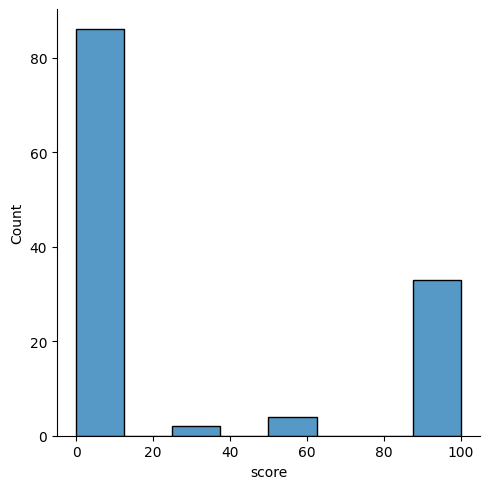

In [16]:
sns.displot(data=df, x="score")

/scratch/work/koutchc1/.conda_envs/learnlab2023/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


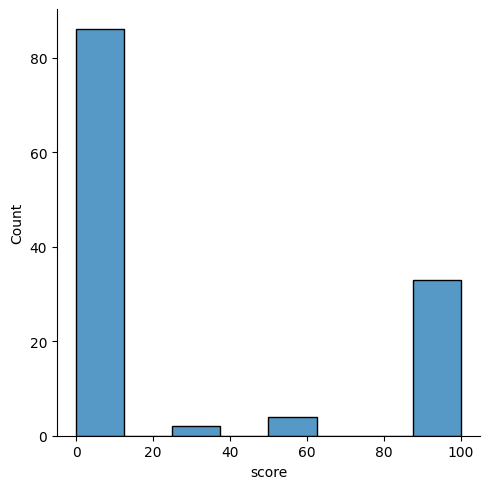

In [17]:
sns.displot(data=df, x="score")

In [ ]:
# TODO: prompt gpt-4 with feedback

Let's take a look at what's the average correctness 